# Data Visualization with Boston Marathon dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2015.csv')
df2 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2016.csv')
df3 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2017.csv')

## 데이터 전처리

In [4]:
# 이전 차시와 거의 동일한 전처리 수행

df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017

df = pd.concat([df1, df2, df3], ignore_index=True)
df = df.drop(['Bib', 'Unnamed: 0', 'Citizen', 'Unnamed: 9', 'Proj Time', 'Gender', 'Division', 'Unnamed: 8'], axis=1) # 시각화에서는 State 데이터 활용
df = df.dropna() # State 데이터 활용 시 미국, 캐나다 외의 해당 칼럼은 결측치이므로 나머지 데이터가 제거됨. 시각화에서만 미국, 캐나다 국적 참가자로 데이터 한정.

time_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']

for col in time_columns:
  df = df[~df[col].str.startswith('-')]

for col in time_columns:
  df[col] = pd.to_timedelta(df[col]).dt.total_seconds() / 60

df = df.reset_index()

In [5]:
df

,index,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
0,6,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,14.750000,29.750000,45.333333,60.716667,64.050000,76.083333,91.983333,108.100000,124.083333,5.016667,131.333333,7,2015
1,7,"Keflezighi, Meb",39,M,San Diego,CA,USA,14.733333,29.733333,44.983333,60.500000,64.033333,76.116667,91.983333,107.983333,124.966667,5.066667,132.700000,8,2015
2,10,"Tegenkamp, Matt",33,M,Portland,OR,USA,14.766667,29.833333,45.550000,61.333333,64.800000,77.133333,93.200000,109.866667,126.916667,5.116667,133.866667,11,2015
3,11,"Eggleston, Jeffrey",30,M,Boulder,CO,USA,15.233333,30.566667,46.100000,61.700000,65.116667,77.316667,93.500000,110.200000,126.783333,5.133333,134.283333,12,2015
4,13,"Arciniaga, Nicholas",31,M,Flagstaff,AZ,USA,14.733333,29.733333,45.233333,61.116667,64.583333,77.833333,95.716667,113.550000,130.666667,5.266667,138.033333,14,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70131,79632,"Quinn, Adam H.",19,M,Belmont,MI,USA,35.233333,70.550000,107.833333,153.966667,162.800000,241.183333,282.983333,333.250000,402.850000,16.200000,424.550000,26406,2017
70132,79633,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,26407,2017
70133,79634,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,26408,2017
70134,79636,"Reilly, Bill",64,M,New York,NY,USA,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,26410,2017


💡시각화 실습의 진행 과정  
1. 시각화 패키지 하나만 사용한 단순한 시각화
2. seaborn, matplotlib의 다양한 세팅을 사용하여 시각화를 정교화

In [6]:
sns.set_theme() # seaborn 패키지의 레이아웃 사용 (선택. 필수 X)

## Bar plot

In [7]:
df_can = df[df['Country'] == 'CAN'] # 캐나다 국적의 참가자 데이터만 선택

<Axes: xlabel='State', ylabel='count'>

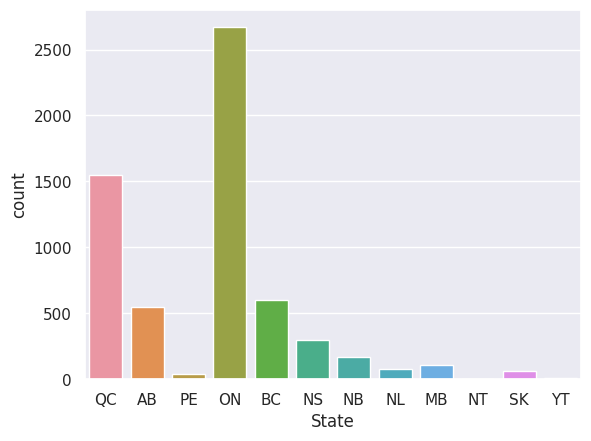

In [8]:
sns.countplot(x='State', data=df_can)

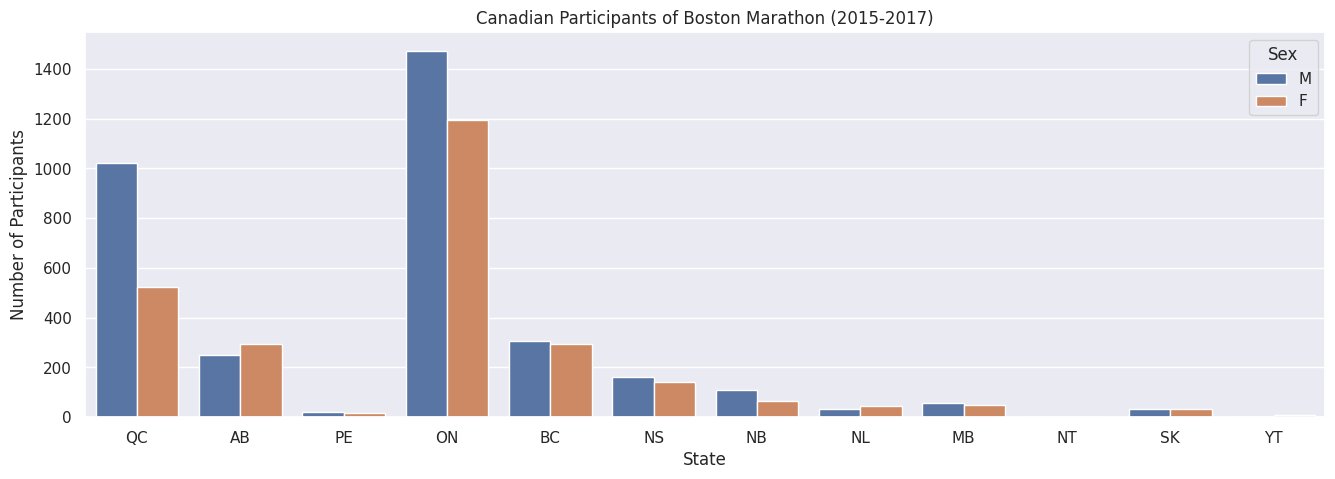

In [10]:
plt.figure(figsize=(16,5)) # figure 사이즈 변경
ax = sns.countplot(x='State', data=df_can, hue='M/F') # 성별에 따른 분류 추가
plt.ylabel('Number of Participants') # y축 label 텍스트 지정
plt.legend(title='Sex') # 범례 이름 변경. M/F -> Sex
plt.title('Canadian Participants of Boston Marathon (2015-2017)') # 차트 제목 지정
plt.show()

## Histograms

<Axes: xlabel='Official Time', ylabel='Count'>

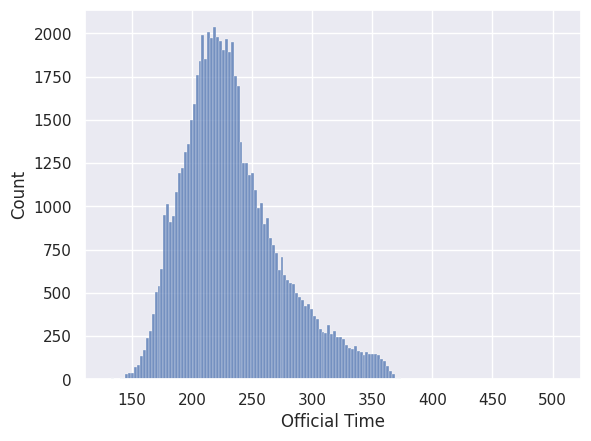

In [11]:
sns.histplot(x='Official Time', data=df)

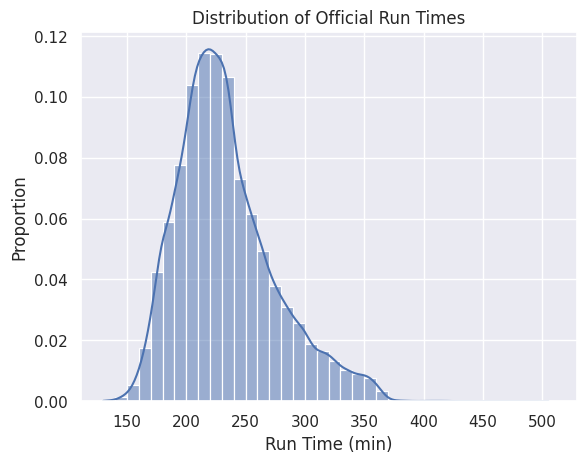

In [12]:
sns.histplot(x='Official Time', data=df, stat='proportion', binwidth=10, kde=True) # 집계 방식 count에서 proportion으로 변경, bar 너비 10분으로 변경, density plot인 KDE 추가
plt.title('Distribution of Official Run Times')
plt.xlabel('Run Time (min)')
plt.show()

## Box plot

<Axes: xlabel='Year', ylabel='Official Time'>

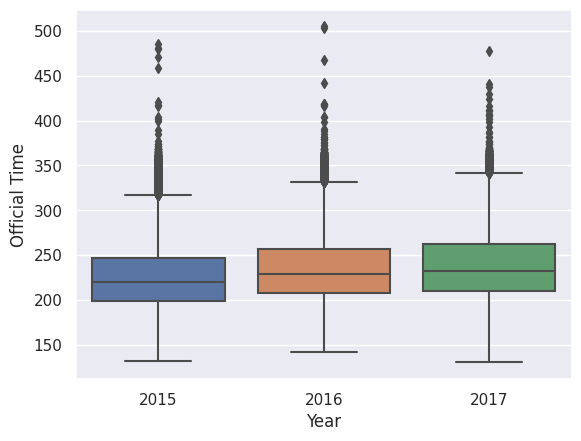

In [13]:
sns.boxplot(x='Year', y='Official Time', data=df)

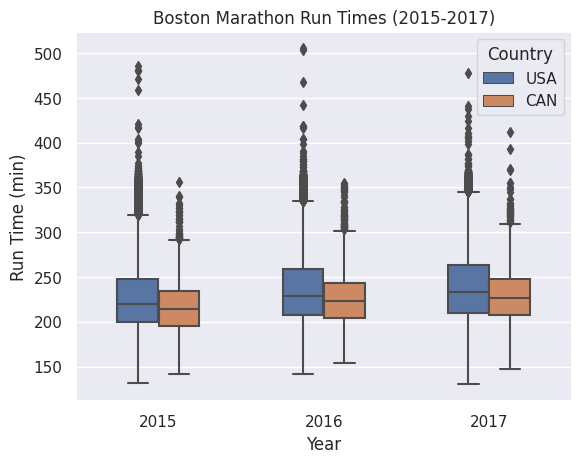

In [14]:
sns.boxplot(x='Year', y='Official Time', data=df, hue='Country', width=.5) # Country에 따른 분류 추가, boxplot의 box 너비 변경.
plt.title('Boston Marathon Run Times (2015-2017)')
plt.ylabel('Run Time (min)')
plt.show()

## Area plot

- 연도별 winner의 각 Stage 기록 시각화

In [15]:
times = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Official Time']

In [19]:
runner1 = df.loc[df[df['Year'] == 2015]['Official Time'].idxmin()]
runner2 = df.loc[df[df['Year'] == 2016]['Official Time'].idxmin()]
runner3 = df.loc[df[df['Year'] == 2017]['Official Time'].idxmin()]

In [20]:
runner1

index                             6
Name             Ritzenhein, Dathan
Age                              32
M/F                               M
City                       Rockford
State                            MI
Country                         USA
5K                            14.75
10K                           29.75
15K                       45.333333
20K                       60.716667
Half                          64.05
25K                       76.083333
30K                       91.983333
35K                           108.1
40K                      124.083333
Pace                       5.016667
Official Time            131.333333
Overall                           7
Year                           2015
Name: 0, dtype: object

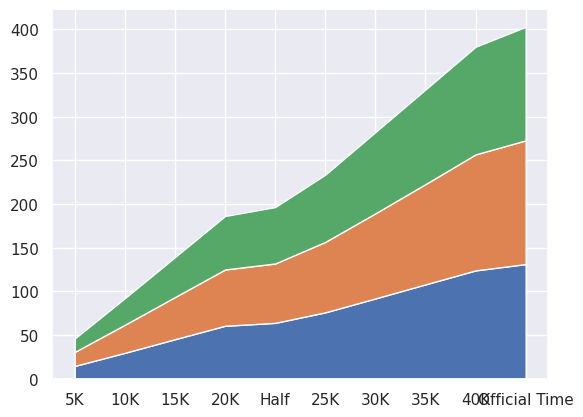

In [21]:
plt.stackplot(times, runner1[times].tolist(), runner2[times].tolist(), runner3[times].tolist())

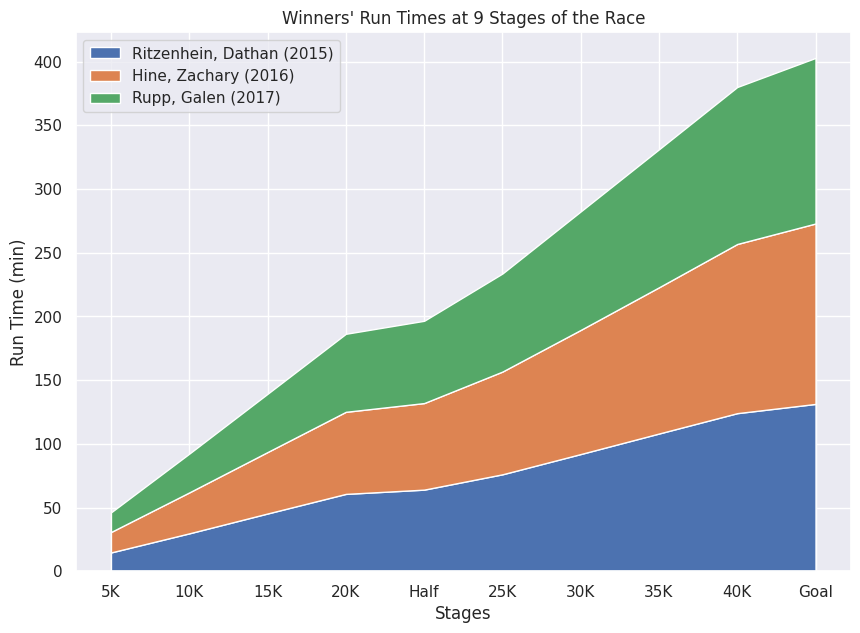

In [23]:
plt.figure(figsize=(10,7))
winners_name = [runner1['Name'] + ' (2015)', runner2['Name'] + ' (2016)', runner3['Name'] + ' (2017)'] # 범례 이름 리스트 만들기
plt.stackplot(times, runner1[times].tolist(), runner2[times].tolist(), runner3[times].tolist(), labels = winners_name)

time_labels = times.copy()
time_labels[-1] = 'Goal'
plt.xticks(range(len(times)), time_labels) # 마지막 x축 눈금의 텍스트를 Official Time 대신 Goal로 변경

plt.legend(loc='upper left') # 범례 위치 지정
plt.xlabel('Stages')
plt.ylabel('Run Time (min)')
plt.title("Winners' Run Times at 9 Stages of the Race")
plt.show()

## Scatter plot

<Axes: xlabel='5K', ylabel='Official Time'>

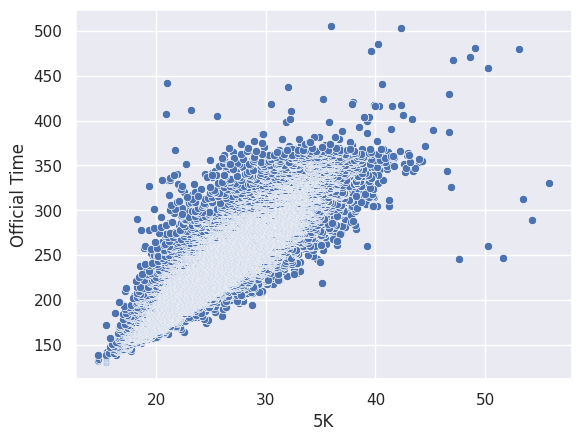

In [24]:
sns.scatterplot(x='5K', y='Official Time', data=df)

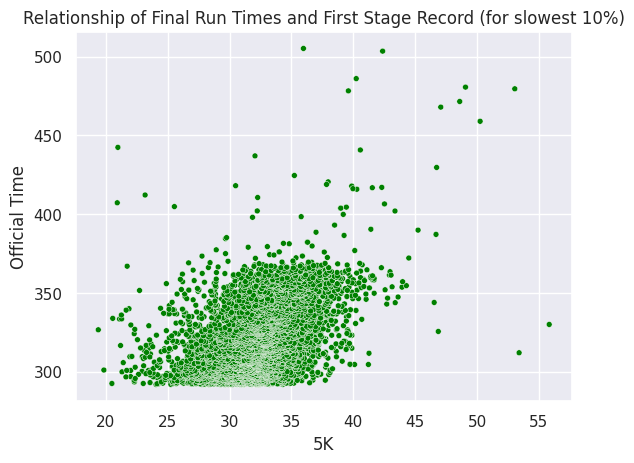

In [26]:
ax = sns.scatterplot(x='5K', y='Official Time', data=df[df['Official Time'] > df['Official Time'].quantile(0.9)], size=.01, color='green') # 하위 그룹 10%에 대해 시각화하도록 변경, marker size와 color 변경
ax.get_legend().remove() # marker size 변경 시 나타나는 범례 제거
plt.title('Relationship of Final Run Times and First Stage Record (for slowest 10%)')
plt.show()

## Pie chart

<Axes: ylabel='Age'>

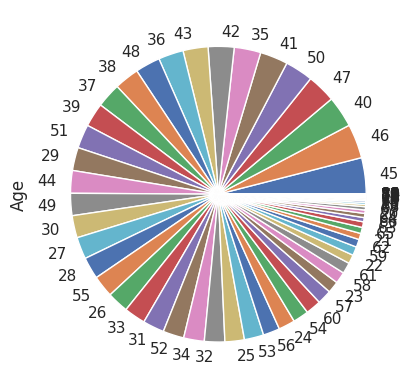

In [28]:
df['Age'].value_counts().plot.pie()

- 연령이 너무 다양해서 pie chart 시각화의 의미가 떨어짐
- 구간별 데이터로 변경하여 시각화 재시도

In [29]:
df['Age_10'] = df['Age'].apply(lambda x: x // 10 * 10 if x < 60 else '60+')
df['Age_10']

0         30
1         30
2         30
3         30
4         30
        ... 
70131     10
70132    60+
70133     20
70134    60+
70135     40
Name: Age_10, Length: 70136, dtype: object

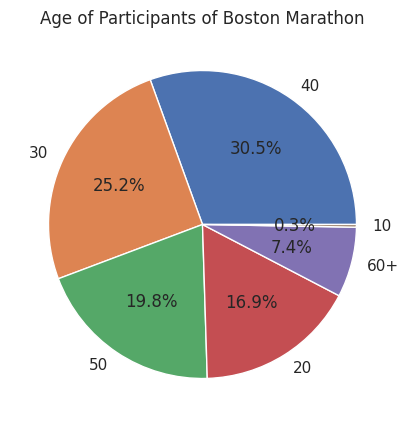

In [31]:
plt.figure(figsize=(5,5))
df['Age_10'].value_counts().plot.pie(autopct='%.1f%%') # 소수점 첫째자리까지 반올림하여 % 표기
plt.title('Age of Participants of Boston Marathon')
plt.ylabel(None) # 자동으로 나타나는 y label 제거
plt.show()